<center>
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>

# Analyzing Where Do People Drink?

Estimated time needed: **30** minutes

## Objectives

After completing this lab you will be able to:

-   Be confident about your data analysis skills


This Dataset is from the story <a href=https://fivethirtyeight.com/features/dear-mona-followup-where-do-people-drink-the-most-beer-wine-and-spirits/>  Dear Mona Followup: Where Do People Drink The Most Beer, Wine And Spirits? </a>  The dataset contains Average serving sizes per person such as average wine, spirit, beer servings. As well as several other metrics. You will be asked to analyze the data and predict the total liters served given the servings. See how to share your lab at the end.


You will need the following libraries:


In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


<b>1.0 Importing the Data</b>


Load the csv:


In [35]:
df= pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/edx/project/drinks.csv')


We use the method  <code>head()</code>  to display the first 5 columns of the dataframe:


In [36]:
df.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


<b>Question 1</b>:  Display the data types of each column using the attribute dtype.


In [37]:
df.dtypes

country                          object
beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

<b>Question 2</b> use the method <code>groupby</code> to get the number of wine servings per continent:


In [38]:
group1 = df[['continent','wine_servings']]
grouped_wine_servings = group1.groupby(['continent'], as_index=False).sum()
grouped_wine_servings


,continent,wine_servings
0,Africa,862
1,Asia,399
2,Europe,6400
3,North America,564
4,Oceania,570
5,South America,749


<b>Question 3:</b> Perform a statistical summary and analysis of beer servings for each continent:


In [39]:


df.head()
continent_indexed = df.set_index("continent", inplace=False)
list_of_conts = grouped_wine_servings['continent']

# continent_indexed.index
# continent_indexed.keys
for cont in list_of_conts:
    cont
    analysis_cont = continent_indexed.loc[cont,['wine_servings']]
    analysis_cont.describe()
    
# analysis_cont = continent_indexed.loc['Asia',['wine_servings']]
# analysis_cont
# analysis_cont
# Asia_group = df.drop( ='Asia', inplace=False)
# dropped = grouped_wine_servings.drop([0],axis=0, inplace=False)
# chosen = grouped_wine_servings.loc('Africa')
# chosen
# grouped_wine_servings

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


'Africa'

,wine_servings
count,53.000000
mean,16.264151
std,38.846419
min,0.000000
25%,1.000000
50%,2.000000
75%,13.000000
max,233.000000


'Asia'

,wine_servings
count,44.000000
mean,9.068182
std,21.667034
min,0.000000
25%,0.000000
50%,1.000000
75%,8.000000
max,123.000000


'Europe'

,wine_servings
count,45.000000
mean,142.222222
std,97.421738
min,0.000000
25%,59.000000
50%,128.000000
75%,195.000000
max,370.000000


'North America'

,wine_servings
count,23.000000
mean,24.521739
std,28.266378
min,1.000000
25%,5.000000
50%,11.000000
75%,34.000000
max,100.000000


'Oceania'

,wine_servings
count,16.00000
mean,35.62500
std,64.55579
min,0.00000
25%,1.00000
50%,8.50000
75%,23.25000
max,212.00000


'South America'

,wine_servings
count,12.000000
mean,62.416667
std,88.620189
min,1.000000
25%,3.000000
50%,12.000000
75%,98.500000
max,221.000000


<b>Question 4:</b> Use the function boxplot in the seaborn library to produce a plot that can be used to show the number of beer servings on each continent.


<Figure size 1080x720 with 0 Axes>

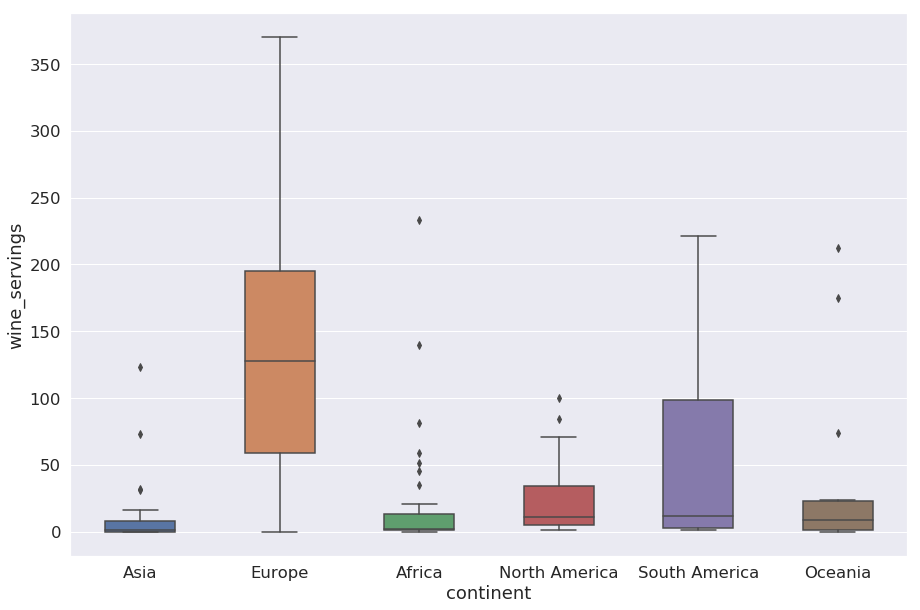

In [40]:
import seaborn as sns 
plt.figure(figsize=(15,10))
sns.boxplot(x='continent',y='wine_servings',data = df,width=0.5)
sns.set(font_scale=1.5)

<b>Question 5</b>: Use the function <code> regplot</code> in the seaborn library to determine if the number of wine servings is
negatively or positively correlated with the number of beer servings.


,beer_servings,wine_servings
beer_servings,1.000000,0.527172
wine_servings,0.527172,1.000000


[(0, 424.94329407779867), (0, 388.55361598603446)]

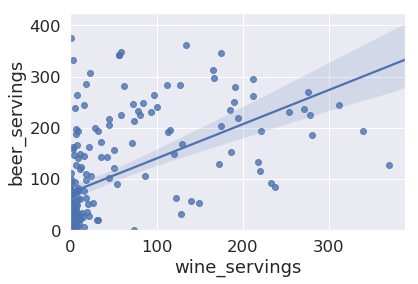

In [41]:

beer_wine_corr = df[['beer_servings','wine_servings']].corr()
beer_wine_corr
ax=sns.regplot(x='wine_servings',y='beer_servings',data=df)
ax.set(ylim=(0,None),xlim=(0,None))

<b> Question 6:</b> Fit a linear regression model to predict the <code>'total_litres_of_pure_alcohol'</code> using the number of <code>'wine_servings'</code> then calculate $R^{2}$:


,wine_servings,total_litres_of_pure_alcohol
0,0,0.0
1,54,4.9
2,14,0.7
3,312,12.4
4,45,5.9


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

The R^2 is : 0.4456875459787605


Text(0.5, 1.0, 'reg plot')

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'resid plot')

Text(0.5, 0, 'wine servings')

Text(0, 0.5, 'pure alcohol')

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'dist plot')

Text(0.5, 0, 'pure alcohol')

Text(0, 0.5, 'proportion of wine servings')

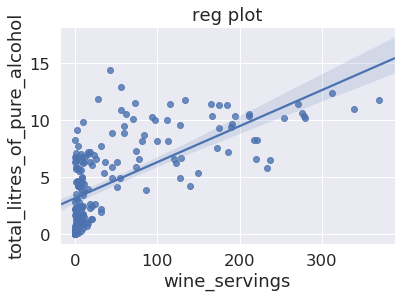

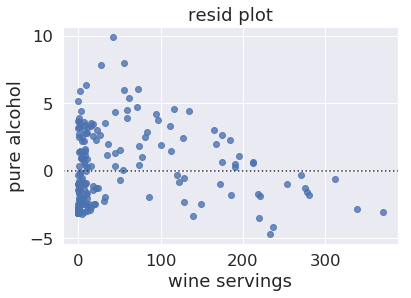

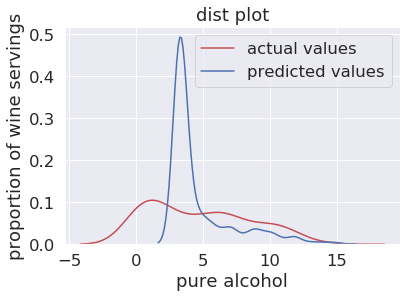

In [42]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
X = df[['wine_servings']]
Y = df[[ 'total_litres_of_pure_alcohol']]

wine_and_pure = df[['wine_servings','total_litres_of_pure_alcohol']]
wine_and_pure.head()

lr.fit(X,Y)
print('The R^2 is :',lr.score(X,Y))
Yhat = lr.predict(X)
plt.title('reg plot')
sns.regplot(x='wine_servings',y='total_litres_of_pure_alcohol', data=df)

plt.figure()
plt.title('resid plot')
plt.xlabel('wine servings')
plt.ylabel('pure alcohol')
sns.residplot(X,Y)

plt.figure()
plt.title('dist plot')
plt.xlabel('pure alcohol')
plt.ylabel('proportion of wine servings')
ax1=sns.distplot(Y,hist=False, color= 'r', label = 'actual values')
sns.distplot(Yhat,hist=False, color= 'b', label = 'predicted values', ax=ax1)
plt.show()
plt.close()

<br>
<b>Note:</b> Please use <code>test_size = 0.10</code> in the following questions.


### Question 7

Use the list of features to predict the <code>'total_litres_of_pure_alcohol'</code>, split the data into training and testing and determine the $R^2$ on the test data, using the provided code:


In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
lr = LinearRegression()
df.head()

x_data = df[['beer_servings','spirit_servings','wine_servings']]
x_data.head()
y_data = df['total_litres_of_pure_alcohol']

x_train,x_test,y_train,y_test = train_test_split(x_data,y_data, test_size=0.1,random_state=0)
lr.fit(x_train,y_train)
lr.score(x_test,y_test)

# scores = cross_val_score(lr,x_data,y_data,cv=3)
# scores

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


,beer_servings,spirit_servings,wine_servings
0,0,0,0
1,89,132,54
2,25,0,14
3,245,138,312
4,217,57,45


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

0.6990304512837944

<b>Question 8 :</b> Create a pipeline object that scales the data, performs a polynomial transform and fits a linear regression model. Fit the object using the training data in the question above, then calculate the R^2 using. the test data. Take a screenshot of your code and the $R^{2}$. There are some hints in the notebook:


<code>'scale'</code>

<code>'polynomial'</code>

<code>'model'</code>

The second element in the tuple contains the model constructor

<code>StandardScaler()</code>

<code>PolynomialFeatures(include_bias=False)</code>

<code>LinearRegression()</code>


In [44]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures

Input = [('scale',StandardScaler()),('polynomial',PolynomialFeatures(degree=2)),('model',LinearRegression())]
pipe=Pipeline(Input)
pipe.fit(x_train,y_train)
pipe.score(x_test,y_test)


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/base.py:467: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('polynomial', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('model', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/pipeline.py:511: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


0.7076376133886035

<b>Question 9</b>: Create and fit a Ridge regression object using the training data, setting the regularization parameter to 0.1 and calculate the $R^{2}$ using the test data. Take a screenshot of your code and the $R^{2}$


In [45]:
from sklearn.linear_model import Ridge
RidgeModel = Ridge(alpha=0.1)
RidgeModel.fit(x_train,y_train)
RidgeModel.score(x_test,y_test)

width = 12
height = 10
plt.figure(figsize=(width, height))


Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

0.699030454901918

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<b>Question 10 </b>: Perform a 2nd order polynomial transform on both the training data and testing data.  Create and fit a Ridge regression object using the training data, setting the regularization parameter to 0.1. Calculate the $R^{2}$ utilizing the test data provided. Take a screen-shot of your code and the $R^{2}$. 


In [46]:
pr=PolynomialFeatures(degree=2,include_bias=False)

trans_x_train = pr.fit_transform(x_train)

trans_x_test = pr.fit_transform(x_test)

RidgeModel = Ridge(alpha=0.1)

RidgeModel.fit(trans_x_train,y_train)
RidgeModel.score(trans_x_test,y_test)


Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

0.7076376228095795

<a href="https://dataplatform.cloud.ibm.com/docs/content/wsj/analyze-data/share-notebooks.html\" > CLICK HERE </a>  to see how to share your notebook


<b>Sources</b>


<a href=https://fivethirtyeight.com/features/dear-mona-followup-where-do-people-drink-the-most-beer-wine-and-spirits/> Dear Mona Followup: Where Do People Drink The Most Beer, Wine And Spirits?</a> by By Mona Chalabi , you can download the dataset <a href=https://github.com/fivethirtyeight/data/tree/master/alcohol-consumption>here</a>.


### Thank you for completing this lab!

## Author

<a href="https://www.linkedin.com/in/joseph-s-50398b136/" target="_blank">Joseph Santarcangelo</a>

## Change Log

| Date (YYYY-MM-DD) | Version | Changed By | Change Description                 |
| ----------------- | ------- | ---------- | ---------------------------------- |
| 2020-08-27        | 2.0     | Lavanya    | Moved lab to course repo in GitLab |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
